# 1. Descripción

En este notebook se presenta un modelo de regresión lineal simple para predecir el precio de automóviles usados en función de diferentes variables que se describen más adelante.

Este problema se toma de la competencia de [*Regression of Used Car Prices*](https://www.kaggle.com/competitions/playground-series-s4e9) de la plataforma de [*Kaggle*](https://www.kaggle.com/) en la que se busca predecir el precio de un automóvil usado y se evalúa el modelo con la métrica de [*Root Mean Squared Logarithmic Error (RMSLE)*](https://www.kaggle.com/competitions/playground-series-s4e9/overview/evaluation).

La solución propuesta fue tomada de [*Insights_EDA_Preprocessing_CATB Modeling | S4E9*](https://www.kaggle.com/code/quantum09/insights-eda-preprocessing-catb-modeling-s4e9/notebook#8.-Modeling-&-Evaluation) propuesta por [*Eunji Goo*](https://www.kaggle.com/quantum09), en la que se realiza un análisis exploratorio de los datos, se preprocesan los datos y se entrena un modelo de [*CatBoostRegressor*](https://catboost.ai/) para predecir el precio de los automóviles usados.

Hay 11 características para predecir el precio de autos usados.

***Variable objetivo:*** **price.** Es lo que se quiere predecir, que es el precio de venta del auto usado.

- **brand:** El fabricante del auto. (BMW, Audi, Chevrolet, etc.)
  
- **model:** El nombre del modelo del auto. (BMW 328i, Chevrolet Camaro 1LT, etc.)
  
- **model_year:** El año en que el auto fue fabricado y salió de la fábrica. Indica el año de producción real del vehículo.

- **milage:** El kilometraje del auto, que indica cuánta distancia ha recorrido el auto.

- **fuel_type:** El tipo de combustible que usa el auto. Ej. Gasolina, Diésel, Eléctrico, etc.

- **engine:** Las especificaciones del motor del auto. (cilindrada, número de cilindros y potencia).

- **transmission:** El tipo de transmisión del auto. (Automática (A/T), Manual (M/T), etc.)

- **ext_col:** El color exterior del auto.

- **int_col:** El color interior del auto.

- **accident:** Indica si el auto ha estado involucrado en algún accidente o ha sufrido daños.

- **clean_title:** Indica el estado del título del auto. 'Sí' / 'No' significa que el auto tiene / no tiene un título limpio.

## 2. Instalar e importar librerias

In [1]:
%pip install catboost
%pip install lightgbm
%pip install xgboost
%pip install scikit-learn
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Basic & EDA
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold

# Model library
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LinearRegression


# Model Evaluating
from sklearn.metrics import mean_squared_error

In [3]:
rs = 42
task_type = 'CPU'

## 3. Importar Datasets

Los datos de entrenamiento y prueba se cargan de la carpeta `data` que se encuentra en el directorio raíz del proyecto y que se desacargaron de la competencia de [*Regression of Used Car Prices*](https://www.kaggle.com/competitions/playground-series-s4e9) de la plataforma de [*Kaggle*](https://www.kaggle.com/). 

In [4]:
df_train = pd.read_csv('../data/train.csv', index_col='id')
df_test = pd.read_csv('../data/test.csv', index_col='id')

## 4. EDA (Análisis Exploratorio de Datos)

### 4.1. Encabezado, Cola, Forma, Valores Faltantes, Duplicados, Estadísticas Descriptivas, etc.

In [5]:
pd.options.display.max_columns = None
print('Tail 10 Examples of Train Dataset : ')
df_train.tail(10)

Tail 10 Examples of Train Dataset : 


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
188523,BMW,328 i,2011,239000,Gasoline,230.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed A/T,Black,Black,None reported,Yes,8000
188524,Chevrolet,Camaro 1LT,2019,59692,Gasoline,335.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Red,Black,At least 1 accident or damage reported,Yes,33600
188525,Audi,A4 2.0T Premium quattro,2011,121886,Gasoline,211.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Black,None reported,Yes,6000
188526,GMC,Yukon XL Denali,2016,89291,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Red,Black,At least 1 accident or damage reported,Yes,24700
188527,Chevrolet,Camaro Z28,1999,110000,Gasoline,310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,White,Gray,None reported,Yes,14500
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [6]:
print('The shape of train dataset is', df_train.shape)
print('The shape of test dataset is', df_test.shape)

The shape of train dataset is (188533, 12)
The shape of test dataset is (125690, 11)


In [7]:
print('The duplicate rows in the train dataset :', df_train.duplicated().sum() )
print('The duplicate rows in the test dataset :', df_test.duplicated().sum() )

The duplicate rows in the train dataset : 0
The duplicate rows in the test dataset : 0


In [8]:
print('The Descriptive Statistics of Train Data : \n')
df_train.describe().T

The Descriptive Statistics of Train Data : 



,count,mean,std,min,25%,50%,75%,max
model_year,188533.0,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
price,188533.0,43878.016178,78819.522254,2000.0,17000.0,30825.0,49900.0,2954083.0


In [9]:
print('The Descriptive Statistics of Test Data : \n')
df_test.describe().T

The Descriptive Statistics of Test Data : 



,count,mean,std,min,25%,50%,75%,max
model_year,125690.0,2015.797526,5.673797,1974.0,2013.0,2017.0,2020.0,2024.0
milage,125690.0,66042.581510,50223.858435,100.0,24500.0,57500.0,95798.0,405000.0


### 4.2. Agrupación de características (Características numéricas vs Características categóricas)

In [10]:
print('The data type of each columns of train dataset : \n')
df_train.info()

The data type of each columns of train dataset : 

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


In [11]:
features = ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']
num_features = ['model_year', 'milage']
cat_features = ['clean_title', 'accident', 'model', 'transmission', 'engine', 'ext_col', 'fuel_type', 'int_col', 'brand']

print('features :', features)
print('num_features :', num_features)
print('cat_features :', cat_features)

features : ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']
num_features : ['model_year', 'milage']
cat_features : ['clean_title', 'accident', 'model', 'transmission', 'engine', 'ext_col', 'fuel_type', 'int_col', 'brand']



### 4.3. Visualización de Valores Faltantes

In [12]:
print('The missing valuse of train dataset : \n', df_train.isnull().sum())
print('The missing valuse of test dataset : \n' , df_test.isnull().sum())

The missing valuse of train dataset : 
 brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64
The missing valuse of test dataset : 
 brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64


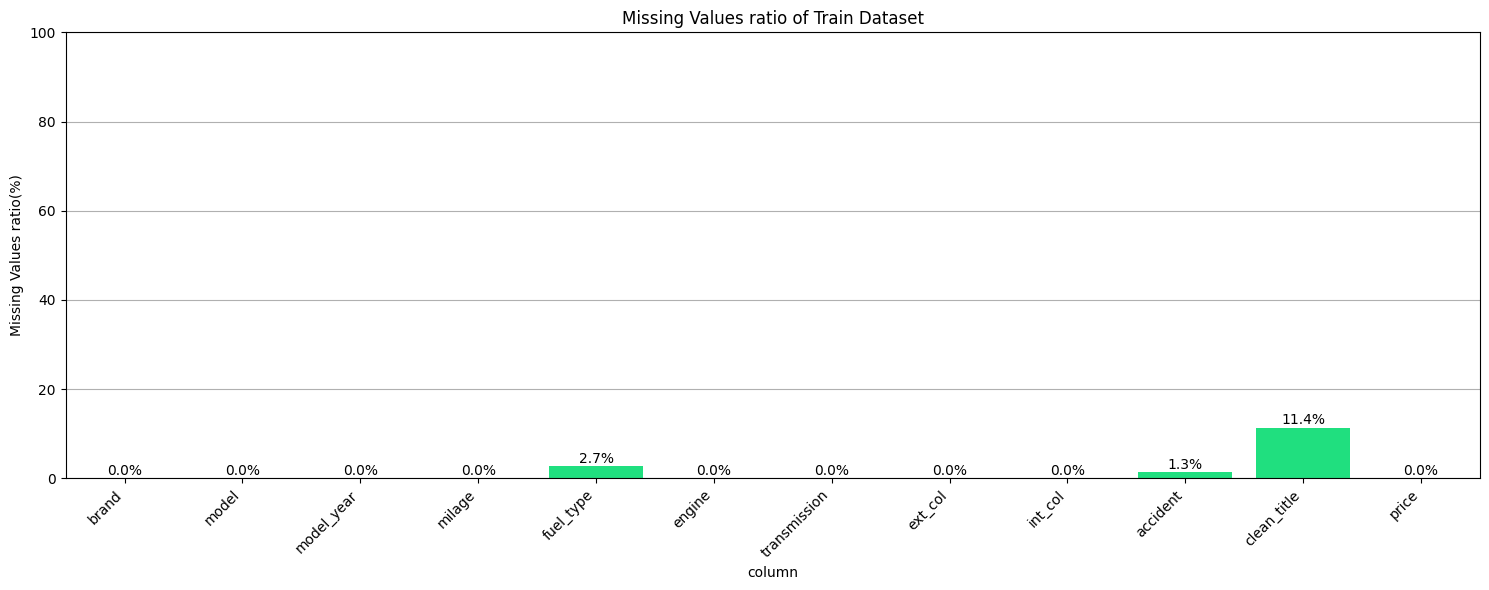

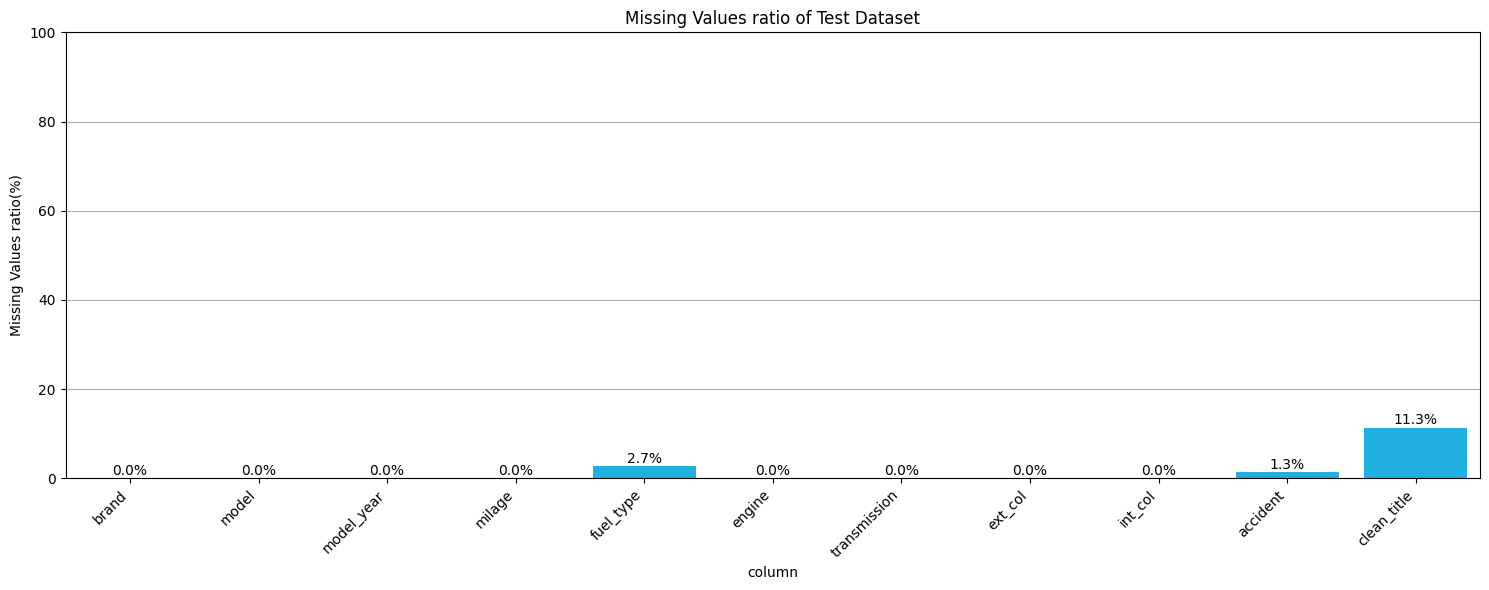

In [13]:
def plot_missing_values(df, title, color):
    missing_ratio = df.isnull().sum() / len(df) * 100
    missing_df = pd.DataFrame({'column': missing_ratio.index, 'missing_ratio': missing_ratio.values})
    
    plt.figure(figsize=(15, 6))
    plt.grid(True)
    ax = sns.barplot(x='column', y='missing_ratio', data=missing_df, color=color)
    
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    
    plt.yticks(range(0, 101, 20))
    plt.ylabel('Missing Values ratio(%)')
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.8,
                '{:.1f}%'.format(height),
                ha="center")
    
    plt.tight_layout()
    plt.show()

    
    
plot_missing_values(df_train, 'Missing Values ratio of Train Dataset', '#00FF7F')
plot_missing_values(df_test, 'Missing Values ratio of Test Dataset', '#00BFFF')


## 5. Preprocesamiento de Datos

### 5.1. Manejo de Valores Faltantes

- **<Paso 1> *Eliminación de columnas:*** No eliminaremos ninguna característica porque la cantidad de valores faltantes es pequeña, y estos valores faltantes podrían no deberse a errores humanos, sino más bien a omisiones intencionales por parte de los encuestados.

- **<Paso 2> *Limpieza de valores faltantes:*** en las características numéricas. No hay valores faltantes en las características numéricas.

- **<Paso 3> *Limpieza de valores faltantes*** en las características categóricas. Los valores faltantes en fuel_type probablemente se debieron a errores humanos, mientras que los valores faltantes en accident, clean_title parecen ser omisiones intencionales por parte de los encuestados.

Se usará la función Imputer para rellenar los valores faltantes en fuel_type con el valor más frecuente, y se etiquetarán los valores faltantes en accident, clean_title como 'missing'.

In [14]:
def cleaning_data(df):
    """
        This function cleans the data by filling the missing values and removing the outliers.

        Args:
        df : DataFrame : The dataset to be cleaned.
    """

    fuel_type_imputer = SimpleImputer(strategy='most_frequent')
    df['fuel_type'] = fuel_type_imputer.fit_transform(df[['fuel_type']]).ravel() 
    
    missing_label_imputer = SimpleImputer(strategy='constant', fill_value='missing')
    df[['accident', 'clean_title']] = missing_label_imputer.fit_transform(df[['accident', 'clean_title']])
    
    return df

In [15]:
df_train_cleaned = cleaning_data(df_train)
print('The missing valuse of train dataset after handling missing values : \n', df_train_cleaned.isnull().sum())

The missing valuse of train dataset after handling missing values : 
 brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


In [16]:
def plot_missing_values_ratio(df, dataset_name='Dataset'):
    """
        This function plots the missing values ratio of the dataset.

        Args:
        df : DataFrame : The dataset to be plotted.
        dataset_name : str : The name of the dataset.
    """
    
    missing_ratio = df.isnull().sum() / len(df) * 100
    missing_df = pd.DataFrame({'column': missing_ratio.index, 'missing_ratio': missing_ratio.values})

    plt.figure(figsize=(15, 6))
    plt.grid(True) 
    ax = sns.barplot(x='column', y='missing_ratio', data=missing_df, color='#FFD700')

    plt.xticks(rotation=45, ha='right')
    plt.title(f'Missing Values ratio of {dataset_name}')
    plt.yticks(range(0, 101, 20))
    plt.ylabel('Missing Values ratio(%)')

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.8,
                '{:.1f}%'.format(height),
                ha="center")
    
    plt.show()

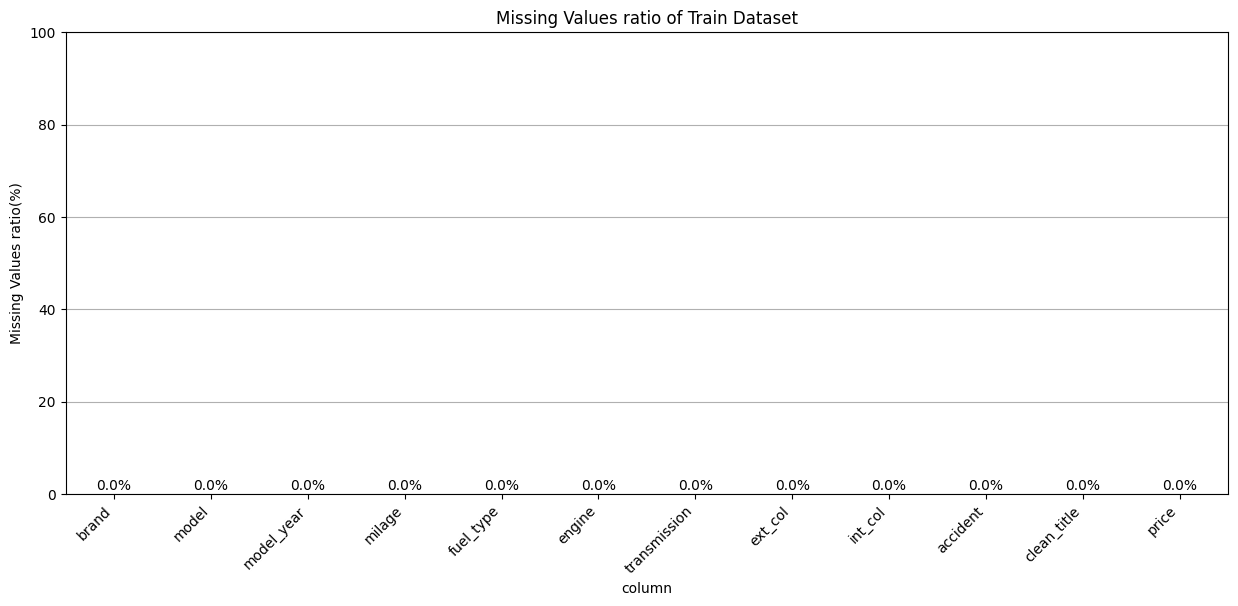

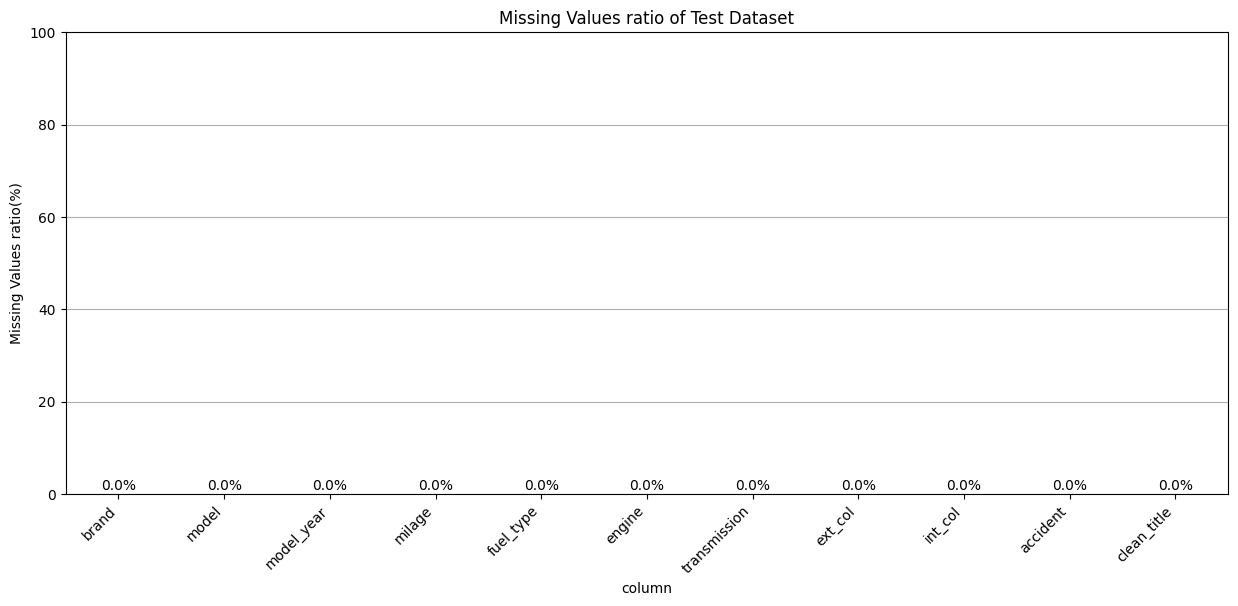

In [23]:
plot_missing_values_ratio(df_train_cleaned, dataset_name='Train Dataset')
df_test_cleaned = cleaning_data(df_test)
plot_missing_values_ratio(df_test_cleaned, dataset_name='Test Dataset')

### 5.2. Normalización

Tenemos dos características numéricas: 'model_year' y 'milage'. Sin embargo, 'model_year' es esencialmente una característica categórica. Usaré Codificación Ordinal para el total de 10 características categóricas.

Las características numéricas se normalizarán.

In [24]:
num_features = ['milage']
cat_features = ['clean_title', 'accident', 'model', 'transmission', 'engine', 'ext_col', 'fuel_type', 'int_col', 'brand', 'model_year']

In [25]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

In [26]:
cat_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
])

In [27]:
preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
])

## 6. Modelado y Evaluación

In [28]:
"""
  x: DataFrame : The features of the dataset from train dataset.
  y: DataFrame : The target of the dataset from train dataset.
  X_test: DataFrame : The features of the dataset from test dataset.
"""

X = df_train_cleaned.drop(columns=['price'])
y = df_train_cleaned['price']

X_test = df_test_cleaned

In [30]:
"""
    In this cell, the dataset is splitted into train and validation sets.
    Then, the model is trained and evaluated using CatBoostRegressor model,
    and the predictions are made on the test set.
"""

rmses = []
preds = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)

for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    print(f'### Fold {fold+1} Training ###')

    X_train = X.loc[train_idx]
    y_train = y.loc[train_idx]
    X_valid = X.loc[valid_idx]
    y_valid = y.loc[valid_idx]
    X_test = X_test
    
    
    for cat_col in cat_features:
        X_train[cat_col] = X_train[cat_col].astype(str)
        X_valid[cat_col] = X_valid[cat_col].astype(str)
        X_test[cat_col] = X_test[cat_col].astype(str)


    X_train_pool = Pool(X_train, y_train, cat_features=cat_features)
    X_valid_pool = Pool(X_valid, y_valid, cat_features=cat_features)
    X_test_pool = Pool(X_test, cat_features=cat_features)

    model = CatBoostRegressor(        
        loss_function='RMSE',
        eval_metric='RMSE',
        learning_rate=0.042,
        iterations=5000,
        depth=10,
        cat_features=cat_features,
        random_strength=0,
        l2_leaf_reg=0.3,
        task_type=task_type,
        random_seed=42,
        verbose=1000
    )

    model.fit(X=X_train_pool, eval_set=X_valid_pool, verbose=1000, early_stopping_rounds=200)
    pred_valid = model.predict(X_valid_pool)
    
    
    pred_valid = model.predict(X_valid_pool)
    preds.append(model.predict(X_test_pool))
    
    rmse = mean_squared_error(y_valid, pred_valid, squared=False)
    
    
    rmses.append(rmse)
    
    print(f'Fold {fold+1} RMSE: {rmse:.5f}\n')

print(f'\nOverall RMSE: {np.mean(rmses):.5f} +/- {np.std(rmses):.5f}')

### Fold 1 Training ###
0:	learn: 78339.0390756	test: 78698.7904373	best: 78698.7904373 (0)	total: 368ms	remaining: 30m 37s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 73051.22726
bestIteration = 199

Shrink model to first 200 iterations.
Fold 1 RMSE: 73051.22726

### Fold 2 Training ###
0:	learn: 78335.1133491	test: 78591.6978206	best: 78591.6978206 (0)	total: 329ms	remaining: 27m 24s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 72896.11767
bestIteration = 293

Shrink model to first 294 iterations.
Fold 2 RMSE: 72896.11767

### Fold 3 Training ###
0:	learn: 78477.2758921	test: 78084.9333366	best: 78084.9333366 (0)	total: 264ms	remaining: 22m
Stopped by overfitting detector  (200 iterations wait)

bestTest = 72776.90949
bestIteration = 324

Shrink model to first 325 iterations.
Fold 3 RMSE: 72776.90949

### Fold 4 Training ###
0:	learn: 78362.2833674	test: 78566.5419060	best: 78566.5419060 (0)	total: 234ms	remaining: 19m 28s
Stopped by overf

## 7. Muestra de Predicciones

Se muestra un conjunto de predicciones realizadas por el modelo para los datos de prueba.

In [31]:
y_pred = np.zeros(len(preds[0]))

for pred in preds: 
    y_pred += pred

y_pred /= len(preds)

In [32]:
y_pred[:10]

array([16995.61054479, 81182.48841235, 56504.19912613, 28063.07647304,
       32240.22425212, 16726.97756402, 13750.34495229, 46029.88986799,
       71649.00496117, 34839.87362894])

In [34]:
X_test['price'] = y_pred
X_test['price'].head()

id
188533    16995.610545
188534    81182.488412
188535    56504.199126
188536    28063.076473
188537    32240.224252
Name: price, dtype: float64